In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv


In [2]:
movie_df = pd.read_csv(r"/kaggle/input/movies-dataset-for-feature-extracion-prediction/movies.csv")
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN


In [3]:
movie_df.isna().sum()


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [4]:
movie_df.columns

Index(['MOVIES', 'YEAR', 'GENRE', 'RATING', 'ONE-LINE', 'STARS', 'VOTES',
       'RunTime', 'Gross'],
      dtype='object')

In [5]:
movie_df.shape

(9999, 9)

In [6]:
movie_df = movie_df.drop(["Gross"], axis=1)# it has mostly null values
movie_df = movie_df.drop(["RunTime"], axis=1)


In [7]:
movie_df.dropna()


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062"
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870"
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805"
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849"
5,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858"
...,...,...,...,...,...,...,...
9960,Sexify,(2021– ),"\nComedy, Drama",7.1,\nAfter facing their parents at Easter breakfa...,\n Director:\nKalina Alabrudzinska\n| \n ...,103
9961,Sexify,(2021– ),"\nComedy, Drama",6.9,\nAfter getting an anonymous tip about the cop...,\n Director:\nKalina Alabrudzinska\n| \n ...,96
9962,Sexify,(2021– ),"\nComedy, Drama",7.1,\nThe big pitch at the university tech competi...,\n Director:\nKalina Alabrudzinska\n| \n ...,100
9963,Castlevania,(2017–2021),"\nAnimation, Action, Adventure",8.2,\nLenore urges Hector to not test Camilla's pa...,\n Director:\nSam Deats\n| \n Stars:\nRi...,911


In [8]:
movie_df.dropna(inplace=True)

In [9]:
movie_df.isna().sum()

MOVIES      0
YEAR        0
GENRE       0
RATING      0
ONE-LINE    0
STARS       0
VOTES       0
dtype: int64

In [10]:
movie_df.shape

(8168, 7)

In [11]:
movie_df.duplicated().sum() #numbers of duplicates

11

In [12]:
movie_df = movie_df.drop_duplicates() #drop all the Duplicates:

In [13]:
#update the index

movie_df.index = range(movie_df.shape[0])
#movie_df.tail()

In [14]:
#movie_df['YEAR']

In [15]:
#movie_df = pd.DataFrame(movie_df)

# Extracting only the years from the 'YEAR' column using regular expressions
movie_df['Correct_year'] = movie_df['YEAR'].str.strip().str.extract(r'(\d{4})')
#movie_df['Correct_year']


# Display the DataFrame with only the years extracted


In [16]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Correct_year
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",2021
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",2021
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",2010
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",2013
4,Outer Banks,(2020– ),"\nAction, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",2020


In [17]:
movie_df['GENRE'] = movie_df['GENRE'].str.strip().str.replace("\n", '')

split_genres = movie_df['GENRE'].str.split(',', expand=True)
#split_genres
movie_df[['genre1', 'genre2', 'genre3']] = split_genres.iloc[:, :3] 
#movie_df[['genre1','genre2', 'genre3']]


In [18]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Correct_year,genre1,genre2,genre3
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",2021,Action,Horror,Thriller
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",2021,Animation,Action,Adventure
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",2010,Drama,Horror,Thriller
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",2013,Animation,Adventure,Comedy
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,\nA group of teenagers from the wrong side of ...,"\n \n Stars:\nChase Stokes, \nMa...","25,858",2020,Action,Crime,Drama


In [19]:
movie_df['ONE-LINE'] = movie_df['ONE-LINE'].str.strip().str.replace("\n", '') #replace all \n with " "
movie_df['ONE-LINE'].str.contains("\n").sum() # check after replacing all \n.

0

In [20]:
movie_df['STARS']

0       \n    Director:\nPeter Thorwarth\n| \n    Star...
1       \n            \n    Stars:\nChris Wood, \nSara...
2       \n            \n    Stars:\nAndrew Lincoln, \n...
3       \n            \n    Stars:\nJustin Roiland, \n...
4       \n            \n    Stars:\nChase Stokes, \nMa...
                              ...                        
8152    \n    Director:\nKalina Alabrudzinska\n| \n   ...
8153    \n    Director:\nKalina Alabrudzinska\n| \n   ...
8154    \n    Director:\nKalina Alabrudzinska\n| \n   ...
8155    \n    Director:\nSam Deats\n| \n    Stars:\nRi...
8156    \n    Director:\nLang Fisher\n| \n    Stars:\n...
Name: STARS, Length: 8157, dtype: object

In [21]:
def edit_stars (df):
    df["STARS"] = df["STARS"].str.strip()
    df["Directors"] = pd.Series()
    df["Actors"] = pd.Series()
    for index in df.index:
        stars = df.loc[index, "STARS"]
        stars = stars.replace("\n", "")
        stars = stars.replace("Directors:", "")
        stars = stars.replace("Director:", "")
        stars = stars.replace("Stars:", "")
        df.at[index, "STARS"] = stars
        if "|" in stars:
            stars = stars.split("|")
            directors = stars[0].strip()
            df.at[index, "Directors"] = directors
            stars = stars[1].strip()
        df.at[index, "Actors"] = stars
    return df

In [22]:
edit_stars(movie_df)

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Correct_year,genre1,genre2,genre3,Directors,Actors
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth| Peri Baumeister, Carl Ant...","21,062",2021,Action,Horror,Thriller,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc..."
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",2021,Animation,Action,Adventure,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey..."
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",2010,Drama,Horror,Thriller,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride..."
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",2013,Animation,Adventure,Comedy,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer..."
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...","25,858",2020,Action,Crime,Drama,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8152,Sexify,(2021– ),"Comedy, Drama",7.1,After facing their parents at Easter breakfast...,"Kalina Alabrudzinska| Aleksandra Skraba, M...",103,2021,Comedy,Drama,None,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8153,Sexify,(2021– ),"Comedy, Drama",6.9,After getting an anonymous tip about the copul...,"Kalina Alabrudzinska| Aleksandra Skraba, M...",96,2021,Comedy,Drama,None,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8154,Sexify,(2021– ),"Comedy, Drama",7.1,The big pitch at the university tech competiti...,"Kalina Alabrudzinska| Aleksandra Skraba, M...",100,2021,Comedy,Drama,None,Kalina Alabrudzinska,"Aleksandra Skraba, Maria Sobocinska, Sandra Dr..."
8155,Castlevania,(2017–2021),"Animation, Action, Adventure",8.2,Lenore urges Hector to not test Camilla's pati...,"Sam Deats| Richard Armitage, James Callis,...",911,2017,Animation,Action,Adventure,Sam Deats,"Richard Armitage, James Callis, Alejandra Reyn..."


In [23]:

split_directors = movie_df['Directors'].str.split(',', expand=True)
#split_directors
# It gives max number of directors i.e; 27

In [24]:
movie_df[['Dir1', 'Dir2', 'Dir3']] = split_directors.iloc[:, :3]  #Extracting only 3 Director names out of 27.
movie_df[['Dir1', 'Dir2', 'Dir3']]

,Dir1,Dir2,Dir3
0,Peter Thorwarth,None,None
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
8152,Kalina Alabrudzinska,None,None
8153,Kalina Alabrudzinska,None,None
8154,Kalina Alabrudzinska,None,None
8155,Sam Deats,None,None


In [25]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Correct_year,genre1,genre2,genre3,Directors,Actors,Dir1,Dir2,Dir3
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth| Peri Baumeister, Carl Ant...","21,062",2021,Action,Horror,Thriller,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Peter Thorwarth,None,None
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",2021,Animation,Action,Adventure,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",NaN,NaN,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",2010,Drama,Horror,Thriller,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",NaN,NaN,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",2013,Animation,Adventure,Comedy,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",NaN,NaN,NaN
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...","25,858",2020,Action,Crime,Drama,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",NaN,NaN,NaN


In [26]:
split_actors = movie_df['Actors'].str.split(',', expand=True)
#split_actors

In [27]:
# we have maximum 4 actors:
#we add these actors into a new columns:

movie_df[['Actor1', 'Actor2', 'Actor3', 'Actor4']] = split_actors.iloc[:, :4]
#movie_df[['Actor1', 'Actor2', 'Actor3', 'Actor4']]



In [28]:
# Alternative way 


#def insert_new_actors (df):
#    actors_full = df["Actors"].dropna()
 #   for index in actors_full.index:
  #      actors = actors_full.loc[index]
   #     actors = actors.split(",")
    #    for i in range(len(actors)):
     #       column_name = "Actor " + str(i + 1)
      #      df.at[index, column_name] = actors[i]
    #    return df
    
    
#insert_new_actors (movie_df)

In [29]:
movie_df.head()

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,Correct_year,genre1,genre2,genre3,Directors,Actors,Dir1,Dir2,Dir3,Actor1,Actor2,Actor3,Actor4
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,"Peter Thorwarth| Peri Baumeister, Carl Ant...","21,062",2021,Action,Horror,Thriller,Peter Thorwarth,"Peri Baumeister, Carl Anton Koch, Alexander Sc...",Peter Thorwarth,None,None,Peri Baumeister,Carl Anton Koch,Alexander Scheer,Kais Setti
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Chris Wood, Sarah Michelle Gellar, Lena Headey...","17,870",2021,Animation,Action,Adventure,NaN,"Chris Wood, Sarah Michelle Gellar, Lena Headey...",NaN,NaN,NaN,Chris Wood,Sarah Michelle Gellar,Lena Headey,Mark Hamill
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Andrew Lincoln, Norman Reedus, Melissa McBride...","885,805",2010,Drama,Horror,Thriller,NaN,"Andrew Lincoln, Norman Reedus, Melissa McBride...",NaN,NaN,NaN,Andrew Lincoln,Norman Reedus,Melissa McBride,Lauren Cohan
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Justin Roiland, Chris Parnell, Spencer Grammer...","414,849",2013,Animation,Adventure,Comedy,NaN,"Justin Roiland, Chris Parnell, Spencer Grammer...",NaN,NaN,NaN,Justin Roiland,Chris Parnell,Spencer Grammer,Sarah Chalke
4,Outer Banks,(2020– ),"Action, Crime, Drama",7.6,A group of teenagers from the wrong side of th...,"Chase Stokes, Madelyn Cline, Madison Bailey, J...","25,858",2020,Action,Crime,Drama,NaN,"Chase Stokes, Madelyn Cline, Madison Bailey, J...",NaN,NaN,NaN,Chase Stokes,Madelyn Cline,Madison Bailey,Jonathan Daviss


In [30]:
#convert vote into int

#movie_df.dtypes
movie_df["VOTES"] = movie_df["VOTES"].str.strip().str.replace(",","")



In [31]:
movie_df["VOTES"] = movie_df["VOTES"].astype(str).astype(int)
movie_df["VOTES"].dtype

dtype('int64')

In [32]:
movie_df["Correct_year"] = movie_df["Correct_year"].astype(str).astype(int)
movie_df["Correct_year"].dtype

dtype('int64')

In [33]:
#movie_df["GENRE"] = movie_df["GENRE"].str.strip()

Unique_genre1 = movie_df["genre1"].value_counts()
#Unique_genre1
Hot_favorites = Unique_genre1.head(10)
Hot_favorites

genre1
Comedy         1715
Animation      1395
Drama          1299
Documentary    1134
Action          994
Crime           676
Reality-TV      176
Adventure       143
Horror          140
Biography       131
Name: count, dtype: int64

In [34]:
#movie_df.head()

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


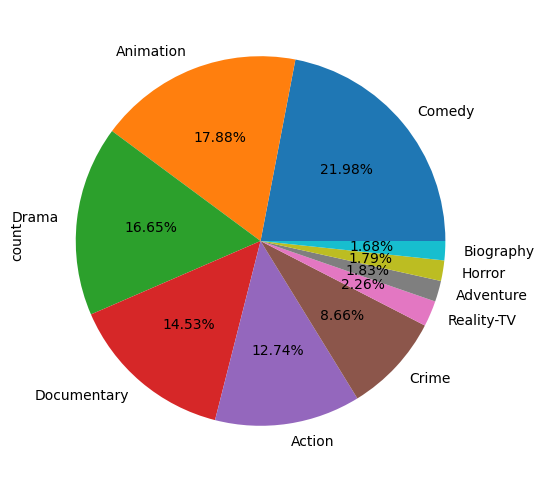

In [36]:
plt.figure(figsize=(10,6))
# Create the pie chart using pandas plot
ratio = Hot_favorites.plot(kind='pie', autopct="%.2f%%")
# Show the plot
plt.show()

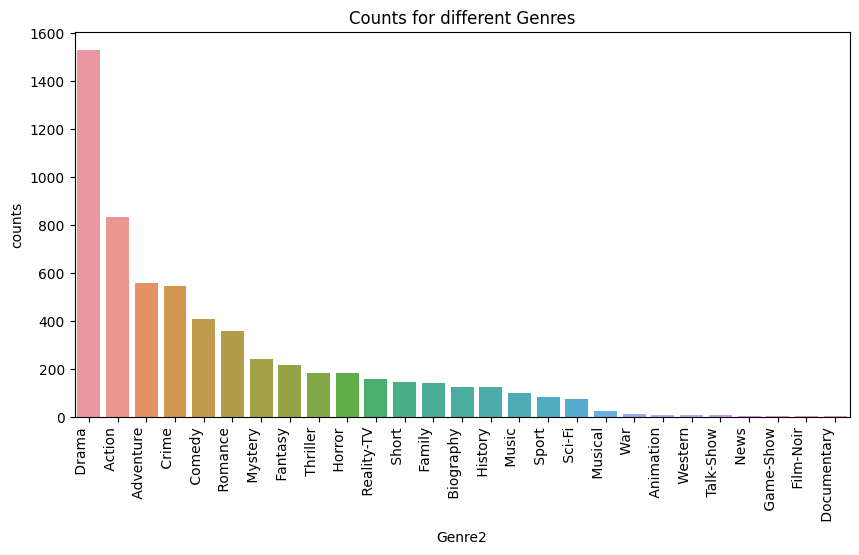

In [37]:

plt.figure(figsize=(10,5))
# Calculate counts for each category
genre_counts = movie_df['genre2'].value_counts()

# Sort the categories based on counts in descending order
genre_counts_sorted = genre_counts.sort_values(ascending=False)

# Create count plot with sorted categories
sns.countplot(x='genre2', data=movie_df, order=genre_counts_sorted.index)

plt.xticks(rotation=90, ha="right")
plt.title('Counts for different Genres')
plt.ylabel('counts')
plt.xlabel('Genre2')
plt.show()

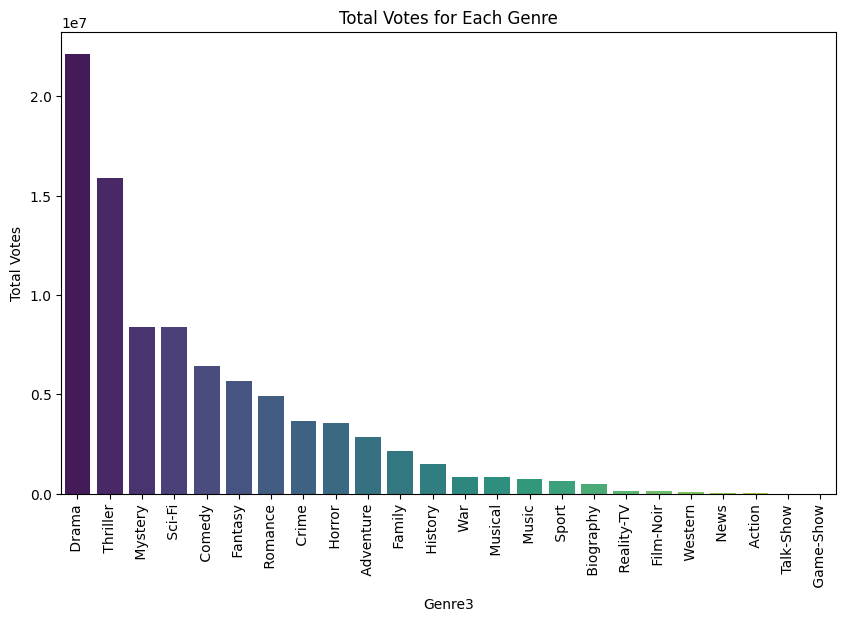

In [38]:
# Calculate total votes for each genre
genre_votes = movie_df.groupby('genre3')['VOTES'].sum().sort_values(ascending=False)

# Plot bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_votes.index, y=genre_votes.values, palette='viridis')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add title and labels
plt.title('Total Votes for Each Genre')
plt.ylabel('Total Votes')
plt.xlabel('Genre3')

# Show the plot
plt.show()